In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json('data.json')
X = df['ingredients']
y = df['cuisine']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
vectorizer = CountVectorizer(analyzer='word')

X_train_encoded = vectorizer.fit_transform([' '.join(x) if isinstance(x, list) else x for x in X_train])


X_test_encoded = vectorizer.transform([' '.join(x) if isinstance(x, list) else x for x in X_test])


features = vectorizer.get_feature_names_out()


counts = X_train_encoded.sum(axis=0).A1

feature_counts = pd.DataFrame({'feature': features, 'count': counts})
feature_counts = feature_counts.sort_values('count', ascending=False)

print(feature_counts.head(30))

print("Количество признаков:", X_train_encoded.shape[1])

       feature  count
1861    pepper  18028
2194      salt  17075
1731       oil  16342
1021    garlic  13296
1122    ground  12810
975      fresh  12518
2218     sauce   9265
1744    onions   8740
2478     sugar   8700
487     cheese   8188
500    chicken   8009
1738     olive   7584
229      black   7530
2731     water   6867
2088       red   6418
947      flour   6206
347     butter   6054
2593  tomatoes   6046
1111     green   6020
1989    powder   5817
537    chopped   5530
574     cloves   5299
1295     juice   4972
2750     white   4880
1743     onion   4813
837       eggs   4591
2110      rice   4274
662      cream   4189
555   cilantro   4175
1595      milk   4089
Количество признаков: 2815


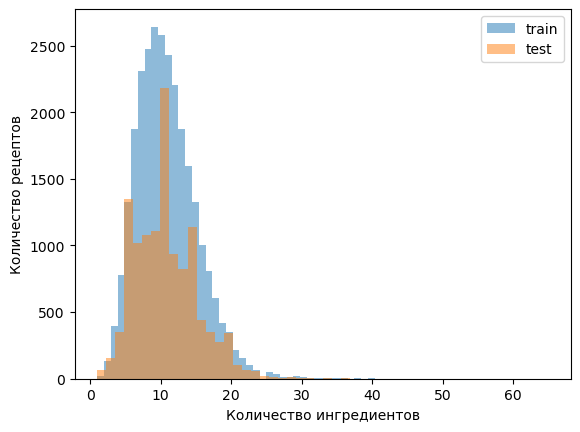

In [4]:
num_ingredients_train = [len(ingredients) for ingredients in X_train]
num_ingredients_test = [len(ingredients) for ingredients in X_test]
plt.hist(num_ingredients_train, bins=50, alpha=0.5, label='train')
plt.hist(num_ingredients_test, bins=50, alpha=0.5, label='test')
plt.xlabel('Количество ингредиентов')
plt.ylabel('Количество рецептов')
plt.legend()
plt.show()

In [5]:
param_grid_knc = {'n_neighbors': [100, 200]}
grid_search_knc = GridSearchCV(KNeighborsClassifier(), param_grid_knc, cv=5)
grid_search_knc.fit(X_train_encoded, y_train)
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None]}
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_search_rf.fit(X_train_encoded, y_train)
param_grid_gbc = {'n_estimators': [50, 100, 200], 'learning_rate': [0.05, 0.1]}
grid_search_gbc = GridSearchCV(GradientBoostingClassifier(), param_grid_gbc, cv=5)
grid_search_gbc.fit(X_train_encoded, y_train)

y_pred_knc = grid_search_knc.predict(X_test_encoded)
accuracy_knc = accuracy_score(y_test, y_pred_knc)
print("Точность модели ближайших соседей:", accuracy_knc)

y_pred_rf = grid_search_rf.predict(X_test_encoded)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Точность модели случайного леса:", accuracy_rf)

y_pred_gbc = grid_search_gbc.predict(X_test_encoded)
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
print("Точность модели градиентного бустинга:", accuracy_gbc)

Точность модели ближайших соседей: 0.5955752953993129
Точность модели случайного леса: 0.7510265649878488
Точность модели градиентного бустинга: 0.7622559289365625


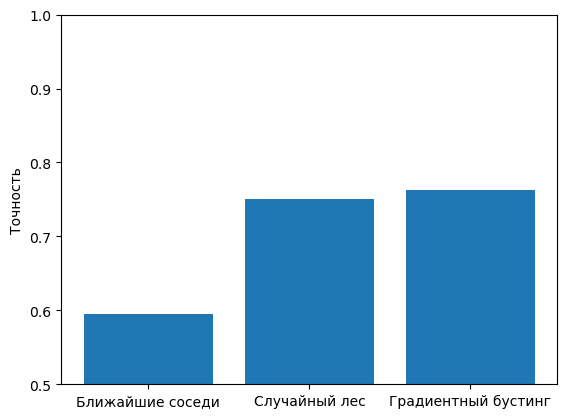

In [6]:
models = ['Ближайшие соседи', 'Случайный лес', 'Градиентный бустинг']
accuracies = [accuracy_knc, accuracy_rf, accuracy_gbc]
plt.bar(models, accuracies)
plt.ylabel('Точность')
plt.ylim((0.5, 1))
plt.show()

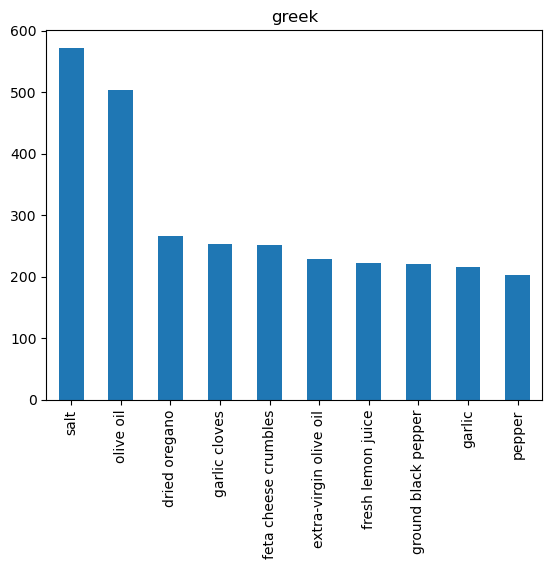

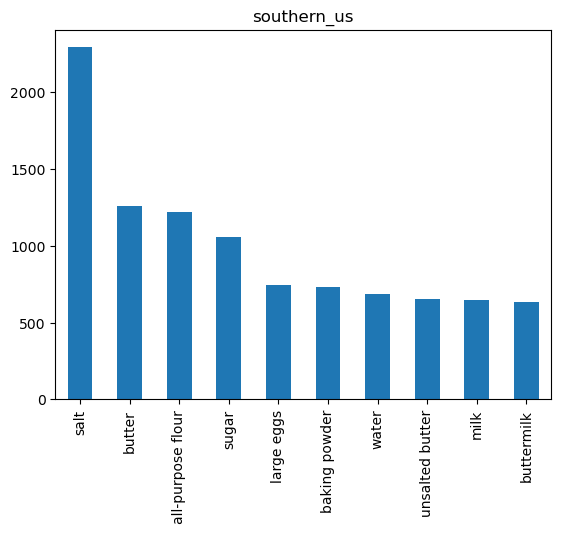

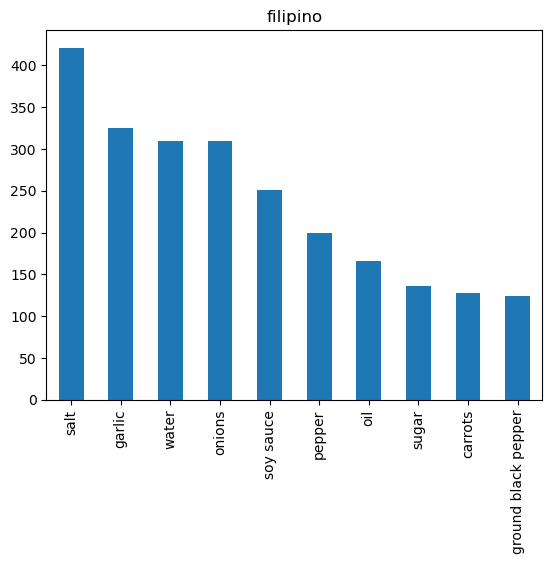

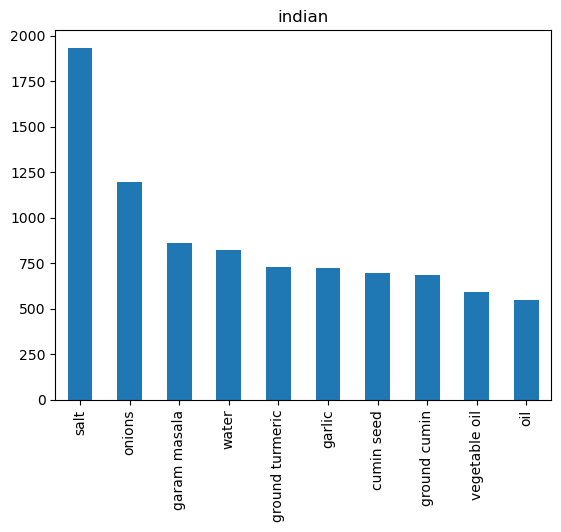

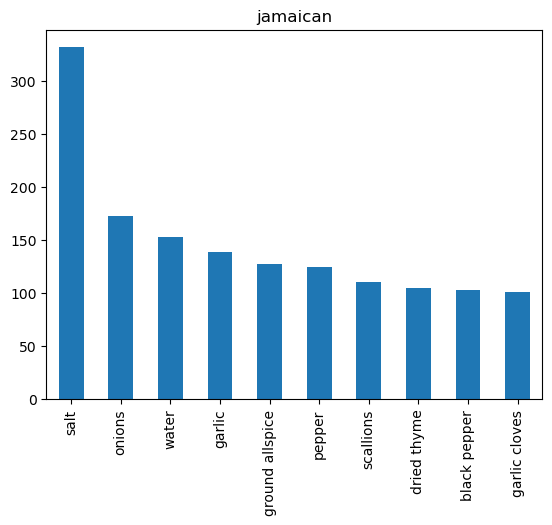

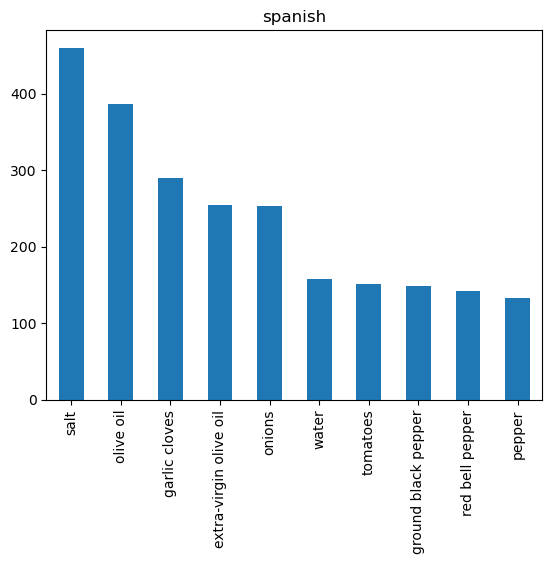

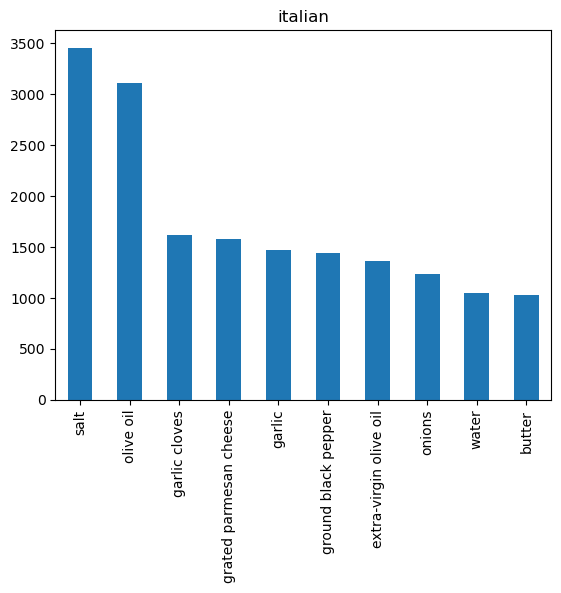

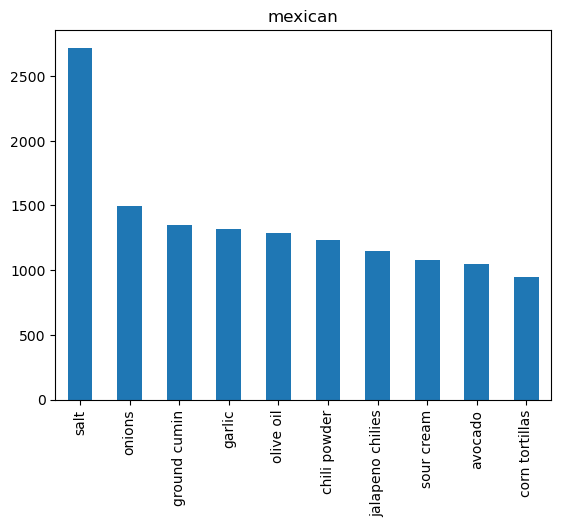

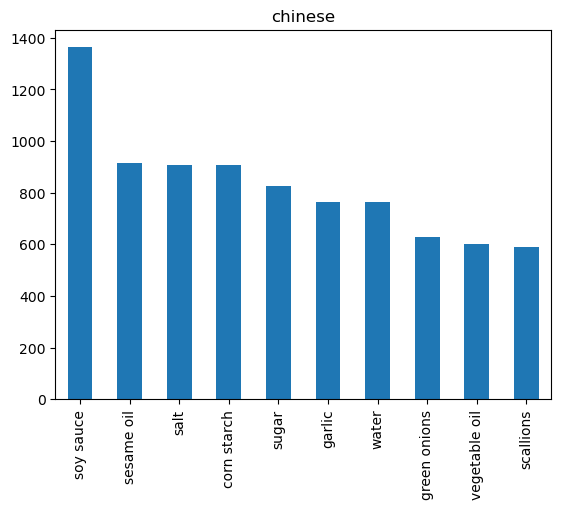

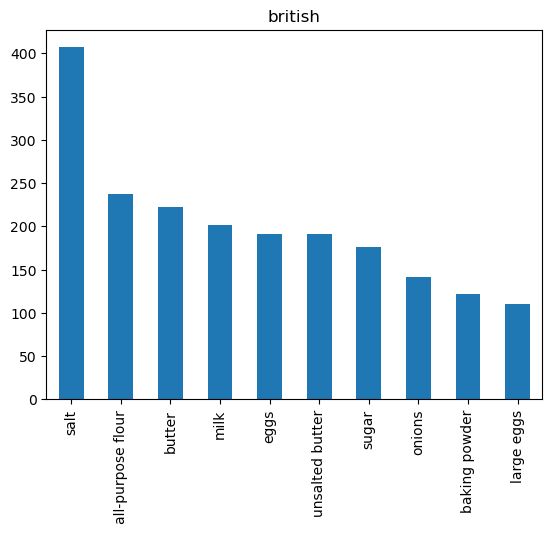

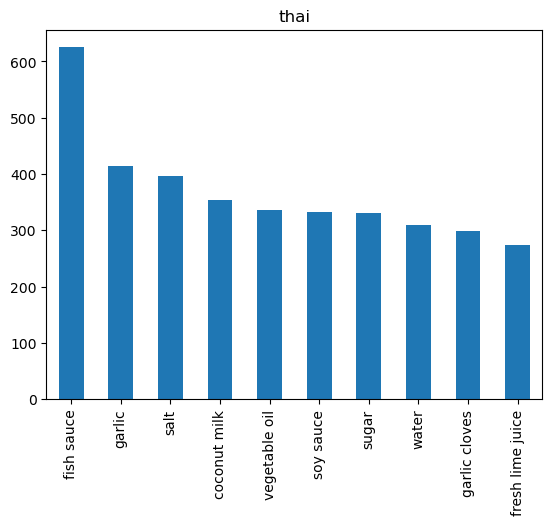

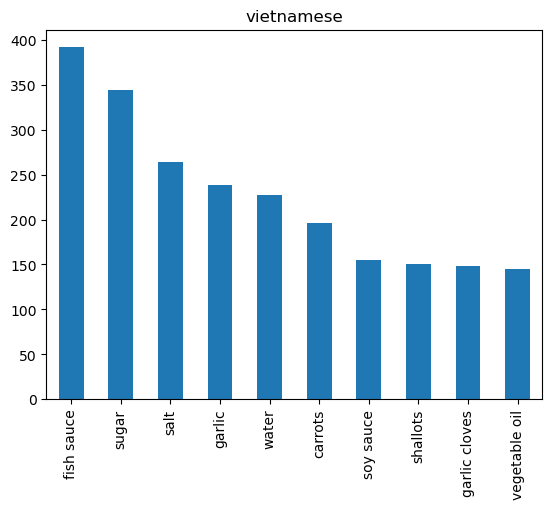

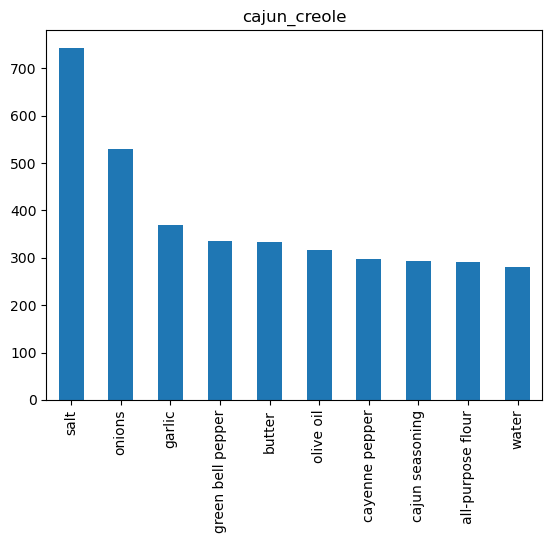

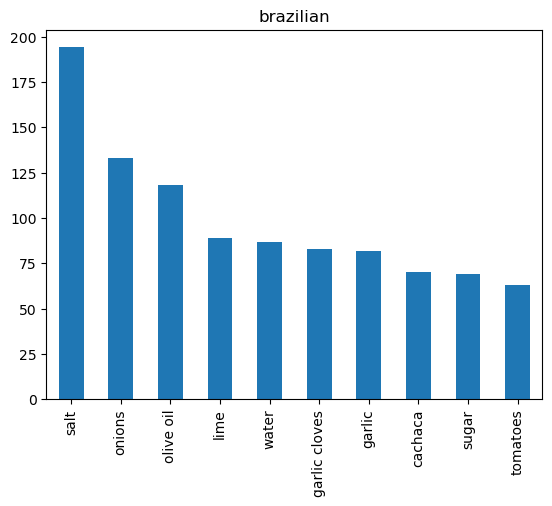

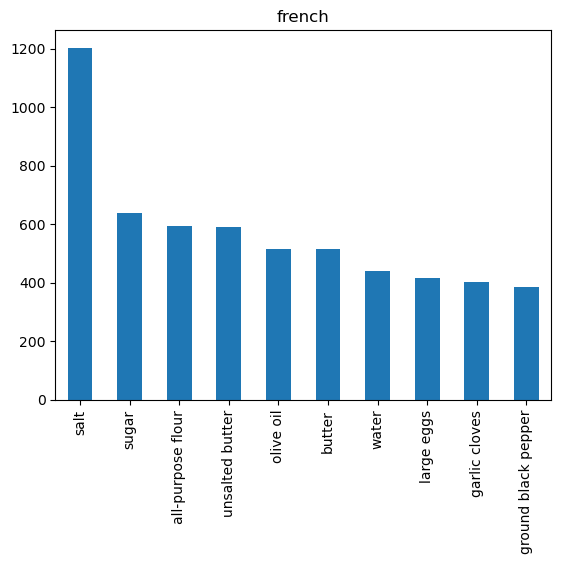

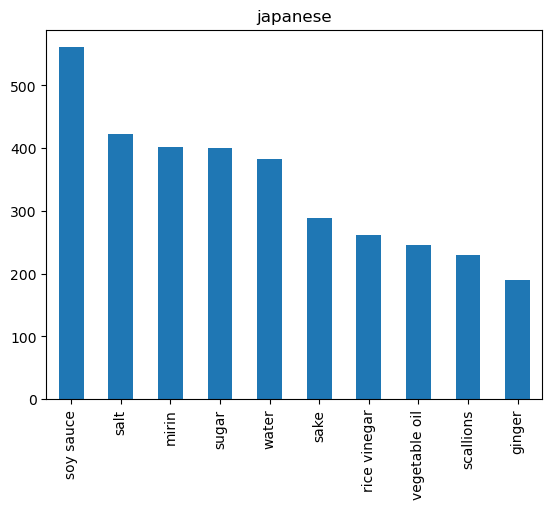

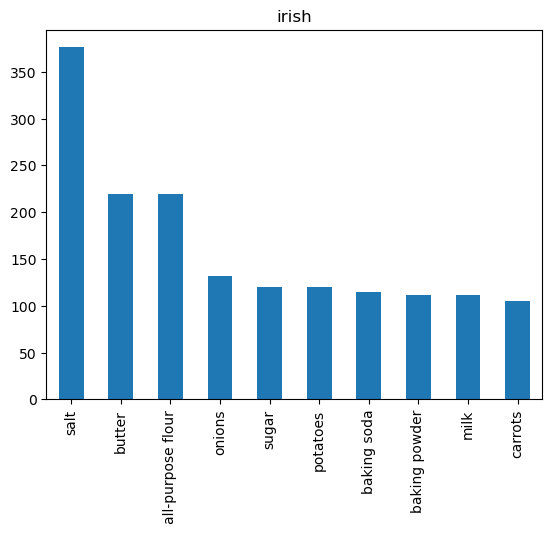

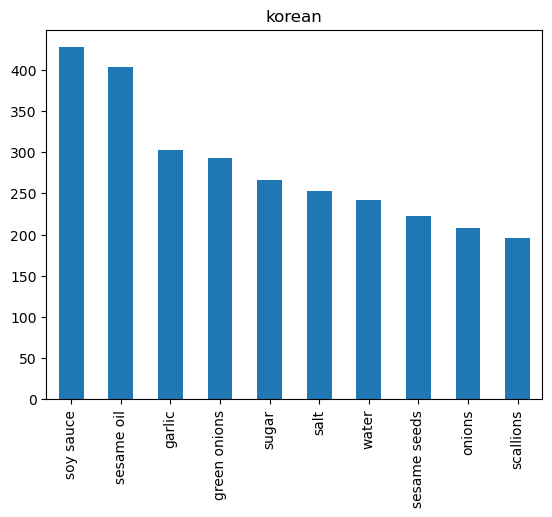

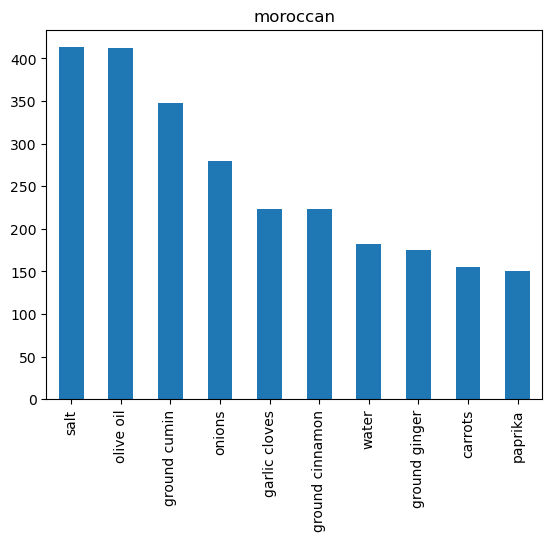

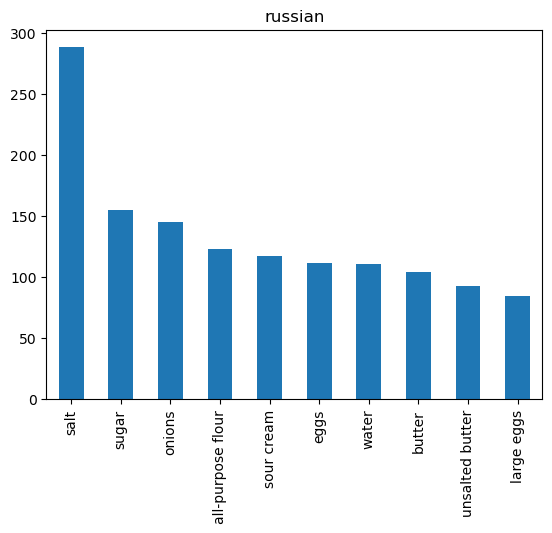

In [7]:
cuisines = df['cuisine'].unique()
for cuisine in cuisines:
    ingredients = []
    for i in range(len(df)):
        if df.loc[i, 'cuisine'] == cuisine:
            ingredients += df.loc[i, 'ingredients']
    top_ingredients = pd.Series(ingredients).value_counts().head(10)
    top_ingredients.plot(kind='bar')
    plt.title(cuisine)
    plt.show()

In [8]:
top_ingredients = feature_counts.head(10)['feature'].tolist()

In [9]:
vectorizer_new = CountVectorizer(analyzer='word', vocabulary=[x for x in features if x not in top_ingredients])

X_train_encoded_new = vectorizer_new.fit_transform([' '.join(x) if isinstance(x, list) else x for x in X_train])

X_test_encoded_new = vectorizer_new.transform([' '.join(x) if isinstance(x, list) else x for x in X_test])

Точность модели ближайших соседей на новых данных: 0.5941506745998492
Точность модели случайного леса на новых данных: 0.7574792591971843
Точность модели градиентного бустинга на новых данных: 0.7609989105840945


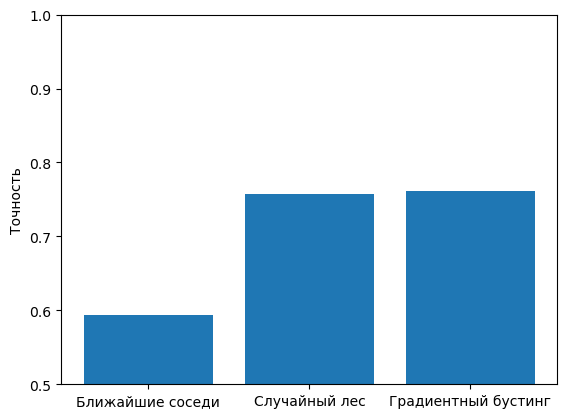

In [10]:
grid_search_knc_new = GridSearchCV(KNeighborsClassifier(), param_grid_knc, cv=5)
grid_search_knc_new.fit(X_train_encoded_new, y_train)

grid_search_rf_new = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_search_rf_new.fit(X_train_encoded_new, y_train)

grid_search_gbc_new = GridSearchCV(GradientBoostingClassifier(), param_grid_gbc, cv=5)
grid_search_gbc_new.fit(X_train_encoded_new, y_train)

y_pred_knc_new = grid_search_knc_new.predict(X_test_encoded_new)
accuracy_knc_new = accuracy_score(y_test, y_pred_knc_new)
print("Точность модели ближайших соседей на новых данных:", accuracy_knc_new)

y_pred_rf_new = grid_search_rf_new.predict(X_test_encoded_new)
accuracy_rf_new = accuracy_score(y_test, y_pred_rf_new)
print("Точность модели случайного леса на новых данных:", accuracy_rf_new)

y_pred_gbc_new = grid_search_gbc_new.predict(X_test_encoded_new)
accuracy_gbc_new = accuracy_score(y_test, y_pred_gbc_new)
print("Точность модели градиентного бустинга на новых данных:", accuracy_gbc_new)

# Сравним точности моделей на новых данных
models = ['Ближайшие соседи', 'Случайный лес', 'Градиентный бустинг']
accuracies_new = [accuracy_knc_new, accuracy_rf_new, accuracy_gbc_new]
plt.bar(models, accuracies_new)
plt.ylabel('Точность')
plt.ylim((0.5, 1))
plt.show()

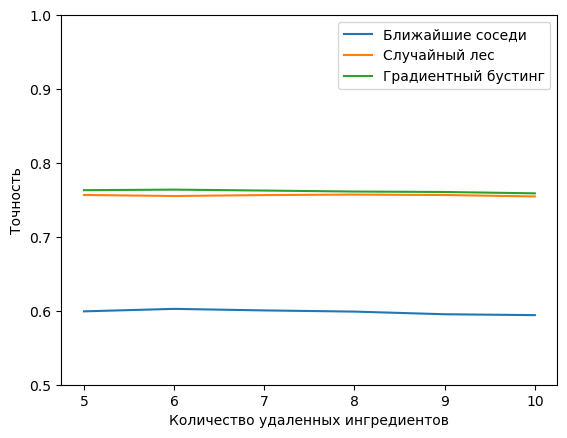

In [11]:
top_ingredients = feature_counts['feature'].tolist()
accuracies_knc = []
accuracies_rf = []
accuracies_gbc = []
for i in range(5, 11):
    vectorizer_new = CountVectorizer(analyzer='word', vocabulary=[x for x in features if x not in top_ingredients[:i]])

    X_train_encoded_new = vectorizer_new.fit_transform([' '.join(x) if isinstance(x, list) else x for x in X_train])
    X_test_encoded_new = vectorizer_new.transform([' '.join(x) if isinstance(x, list) else x for x in X_test])

    grid_search_knc_new = GridSearchCV(KNeighborsClassifier(), param_grid_knc, cv=5)
    grid_search_knc_new.fit(X_train_encoded_new, y_train)

    grid_search_rf_new = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
    grid_search_rf_new.fit(X_train_encoded_new, y_train)
    
    grid_search_gbc_new = GridSearchCV(GradientBoostingClassifier(), param_grid_gbc, cv=5)
    grid_search_gbc_new.fit(X_train_encoded_new, y_train)

    y_pred_knc_new = grid_search_knc_new.predict(X_test_encoded_new)
    accuracy_knc_new = accuracy_score(y_test, y_pred_knc_new)
    accuracies_knc.append(accuracy_knc_new)

    y_pred_rf_new = grid_search_rf_new.predict(X_test_encoded_new)
    accuracy_rf_new = accuracy_score(y_test, y_pred_rf_new)
    accuracies_rf.append(accuracy_rf_new)
    
    y_pred_gbc_new = grid_search_gbc_new.predict(X_test_encoded_new)
    accuracy_gbc_new = accuracy_score(y_test, y_pred_gbc_new)
    accuracies_gbc.append(accuracy_gbc_new)

plt.plot(range(5, 11), accuracies_knc, label='Ближайшие соседи')
plt.plot(range(5, 11), accuracies_rf, label='Случайный лес')
plt.plot(range(5, 11), accuracies_gbc, label='Градиентный бустинг')
plt.xlabel('Количество удаленных ингредиентов')
plt.ylabel('Точность')
plt.ylim((0.5, 1))
plt.legend()
plt.show()